### State Space Discretization

In [613]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tempfile
import base64
import pprint
import json
import sys
import gym
import io

from gym import wrappers
from subprocess import check_output
from IPython.display import HTML

#### Q-Learning

In [2]:
def action_selection(state, Q, episode, n_episodes):
    epsilon = max(0, episode/n_episodes*2)
    if np.random.random() < epsilon:
        action = np.random.randint(len(Q[0]))
    else:
        action = np.argmax(Q[state])
    return action

In [3]:
def q_learning(env, alpha = 0.9, gamma = 0.9):
    nS = env.env.observation_space.n
    nA = env.env.action_space.n
    
    Q = np.random.random((nS, nA)) * 2.0
    n_episodes = 10000
    
    for episode in range(n_episodes//2, -n_episodes//2, -1):
        state = env.reset()
        done = False
        while not done:
            action = action_selection(state, Q, episode, n_episodes)
            nstate, reward, done, info = env.step(action)
            Q[state][action] += alpha * (reward + gamma * Q[nstate].max() * (not done) - Q[state][action])
            state = nstate
    return Q

In [4]:
mdir = tempfile.mkdtemp()
env = gym.make('CartPole-v0')
env = wrappers.Monitor(env, mdir, force=True)

Q = q_learning(env)

[2017-04-02 00:50:08,139] Making new env: CartPole-v0


AttributeError: 'Box' object has no attribute 'n'

In [404]:
dir(env.env.observation_space)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'contains',
 'from_jsonable',
 'high',
 'low',
 'sample',
 'shape',
 'to_jsonable']

In [418]:
env = gym.make('CartPole-v0')
observations = []
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        observations.append(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()
x_vals = np.array(observations)[:,0]
xd_vals = np.array(observations)[:,1]
a_vals = np.array(observations)[:,2]
ad_vals = np.array(observations)[:,3]
y = np.zeros_like(x_vals)

[2017-04-02 03:32:44,012] Making new env: CartPole-v0


Episode finished after 17 timesteps
Episode finished after 18 timesteps
Episode finished after 19 timesteps
Episode finished after 23 timesteps
Episode finished after 19 timesteps
Episode finished after 14 timesteps
Episode finished after 34 timesteps
Episode finished after 20 timesteps
Episode finished after 11 timesteps
Episode finished after 53 timesteps
Episode finished after 23 timesteps
Episode finished after 11 timesteps
Episode finished after 28 timesteps
Episode finished after 19 timesteps
Episode finished after 18 timesteps
Episode finished after 17 timesteps
Episode finished after 52 timesteps
Episode finished after 12 timesteps
Episode finished after 34 timesteps
Episode finished after 14 timesteps


In [419]:
env.env.observation_space.high/2

array([  2.40000000e+00,   1.70141173e+38,   2.09439510e-01,
         1.70141173e+38])

In [420]:
env.env.observation_space.low/2

array([ -2.40000000e+00,  -1.70141173e+38,  -2.09439510e-01,
        -1.70141173e+38])

In [421]:
x_thres_high = (env.env.observation_space.high/2)[0]
x_thres_low = (env.env.observation_space.low/2)[0]
angle_thres_high = (env.env.observation_space.high/2)[2]
angle_thres_low = (env.env.observation_space.low/2)[2]

(-0.2, 0.2)

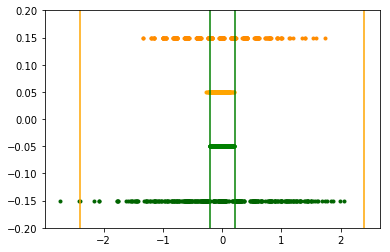

In [556]:
plt.plot(xd_vals, y + 0.15, '.', color='darkorange')
plt.plot(x_vals, y + 0.05, '.', color='orange')
plt.plot(a_vals, y - 0.05, '.', color='green')
plt.plot(ad_vals, y - 0.15, '.', color='darkgreen')


plt.axvline(x=x_thres_high, color='orange')
plt.axvline(x=x_thres_low, color='orange')
plt.axvline(x=angle_thres_high, color='green')
plt.axvline(x=angle_thres_low, color='green')

plt.ylim([-0.2, 0.2])

(-0.1, 0.1)

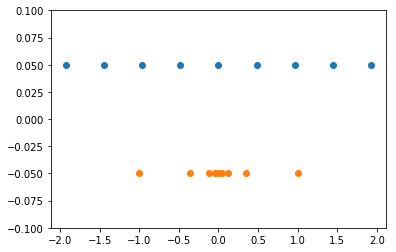

In [565]:
x1 = np.linspace(x_thres_low, x_thres_high, 
                 10, endpoint=False)[1:]
all_vals = np.sort(np.append(
    (np.logspace(-6, 3, 6, endpoint=False, base=2)[1:],
    -np.logspace(-6, 3, 6, endpoint=False, base=2)[1:]), 0))
idxs = np.where(np.abs(all_vals) < x_thres_high)
x2 = all_vals[idxs]
y1 = np.zeros(len(x1)) + 0.05
y2 = np.zeros(len(x2)) - 0.05
plt.plot(x1, y1, 'o')
plt.plot(x2, y2, 'o')

plt.ylim([-0.1, 0.1])

In [566]:
x2

array([-1.        , -0.35355339, -0.125     , -0.04419417,  0.        ,
        0.04419417,  0.125     ,  0.35355339,  1.        ])

In [567]:
len(x2)

9

(-0.1, 0.1)

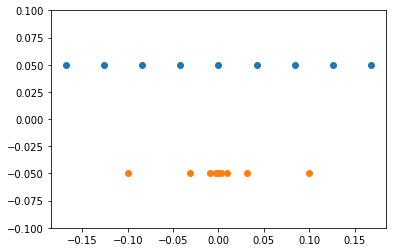

In [568]:
a1 = np.linspace(angle_thres_low, angle_thres_high, 
                 10, endpoint=False)[1:]
all_vals = np.sort(np.append(
    (np.logspace(-10, 0.01, 6, endpoint=False, base=2)[1:],
    -np.logspace(-10, 0.01, 6, endpoint=False, base=2)[1:]), 0))
idxs = np.where(np.abs(all_vals) < angle_thres_high)
a2 = all_vals[idxs]
y1 = np.zeros(len(a1)) + 0.05
y2 = np.zeros(len(a2)) - 0.05
plt.plot(a1, y1, 'o')
plt.plot(a2, y2, 'o')

plt.ylim([-0.1, 0.1])

In [569]:
a2

array([-0.09967209, -0.03135849, -0.0098659 , -0.00310398,  0.        ,
        0.00310398,  0.0098659 ,  0.03135849,  0.09967209])

In [570]:
len(a2)

9

In [571]:
np.digitize(-0.99, a2)

array(0)

In [572]:
np.digitize(0.99, a2)

array(9)

In [573]:
np.digitize(0, a2)

array(5)

In [574]:
np.digitize(-0.0001, a2)

array(4)

In [575]:
np.digitize(0.0001, a2)

array(5)

In [576]:
env = gym.make('CartPole-v0')
observations = []
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        observations.append(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()
x_vals = np.array(observations)[:,0]
xd_vals = np.array(observations)[:,1]
a_vals = np.array(observations)[:,2]
ad_vals = np.array(observations)[:,3]
y = np.zeros_like(x_vals)

[2017-04-02 04:12:04,220] Making new env: CartPole-v0
[2017-04-02 04:12:04,238] Finished writing results. You can upload them to the scoreboard via gym.upload('/tmp/tmp024uz2b5')


Episode finished after 32 timesteps
Episode finished after 12 timesteps
Episode finished after 20 timesteps
Episode finished after 12 timesteps
Episode finished after 17 timesteps
Episode finished after 21 timesteps
Episode finished after 15 timesteps
Episode finished after 17 timesteps
Episode finished after 15 timesteps
Episode finished after 19 timesteps
Episode finished after 20 timesteps
Episode finished after 15 timesteps
Episode finished after 9 timesteps
Episode finished after 28 timesteps
Episode finished after 18 timesteps
Episode finished after 9 timesteps
Episode finished after 10 timesteps
Episode finished after 29 timesteps
Episode finished after 20 timesteps
Episode finished after 40 timesteps


(-0.2, 0.2)

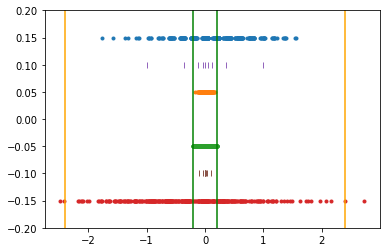

In [578]:
plt.plot(xd_vals, y + 0.15, '.')
plt.plot(x_vals, y + 0.05, '.')
plt.plot(a_vals, y - 0.05, '.')
plt.plot(ad_vals, y - 0.15, '.')

yx2 = np.zeros_like(x2) + 0.1
ya2 = np.zeros_like(a2) - 0.1
plt.plot(x2, yx2, '|')
plt.plot(a2, ya2, '|')

plt.axvline(x=x_thres_high, color='orange')
plt.axvline(x=x_thres_low, color='orange')
plt.axvline(x=angle_thres_high, color='green')
plt.axvline(x=angle_thres_low, color='green')

plt.ylim([-0.2, 0.2])

In [585]:
d1 = np.sort(np.append(np.linspace(-2, 2, 8, endpoint=True), 0))
d1

array([-2.        , -1.42857143, -0.85714286, -0.28571429,  0.        ,
        0.28571429,  0.85714286,  1.42857143,  2.        ])

In [586]:
len(d1)

9

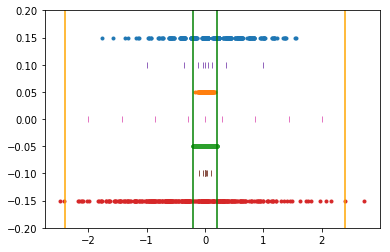

In [587]:
plt.plot(xd_vals, y + 0.15, '.')
plt.plot(x_vals, y + 0.05, '.')
plt.plot(a_vals, y - 0.05, '.')
plt.plot(ad_vals, y - 0.15, '.')

yx2 = np.zeros_like(x2) + 0.1
ya2 = np.zeros_like(a2) - 0.1
plt.plot(x2, yx2, '|')
plt.plot(a2, ya2, '|')

plt.axvline(x=x_thres_high, color='orange')
plt.axvline(x=x_thres_low, color='orange')
plt.axvline(x=angle_thres_high, color='green')
plt.axvline(x=angle_thres_low, color='green')

plt.ylim([-0.2, 0.2])

yd1 = np.zeros(len(d1))
plt.plot(d1, yd1, '|')

In [588]:
len(x2)

9

In [589]:
len(a2)

9

In [590]:
len(d1)

9

In [591]:
len(d1)

9

In [607]:
def observation_to_state(obsevation, bins):
    ss = []
    for i in range(len(observation)):
        ss.append(int(np.digitize(observation[i], bins=bins[i])))
    state = int("".join(map(lambda feature: str(int(feature)), ss)))
    return state

In [625]:
def q_learning(env, bins, alpha = 0.9, gamma = 0.9):
    nS = (len(bins[0]) + 1) * (len(bins[1]) + 1) * \
         (len(bins[2]) + 1) * (len(bins[3]) + 1)
    nA = env.env.action_space.n

    Q = np.random.random((nS, nA)) * 10.0
    n_episodes = 1000000
    
    for episode in range(n_episodes//2, -n_episodes//2, -1):
        observation = env.reset()
        state = observation_to_state(observation, bins)
    
        done = False
        while not done:
            action = action_selection(state, Q, episode, n_episodes)
            observation, reward, done, info = env.step(action)
            nstate = observation_to_state(observation, bins)
            Q[state][action] += alpha * (reward + gamma * Q[nstate].max() * (not done) - Q[state][action])
            state = nstate
    return Q

In [ ]:
mdir = tempfile.mkdtemp()
env = gym.make('CartPole-v0')
env = wrappers.Monitor(env, mdir, force=True)

Q = q_learning(env, (x2, d1, a2, d1))

[2017-04-02 04:28:41,124] Making new env: CartPole-v0
[2017-04-02 04:28:41,129] Starting new video recorder writing to /tmp/tmpyd9rsieu/openaigym.video.35.225.video000000.mp4
[2017-04-02 04:28:41,716] Starting new video recorder writing to /tmp/tmpyd9rsieu/openaigym.video.35.225.video000001.mp4
[2017-04-02 04:28:42,091] Starting new video recorder writing to /tmp/tmpyd9rsieu/openaigym.video.35.225.video000008.mp4
[2017-04-02 04:28:42,477] Starting new video recorder writing to /tmp/tmpyd9rsieu/openaigym.video.35.225.video000027.mp4
[2017-04-02 04:28:43,065] Starting new video recorder writing to /tmp/tmpyd9rsieu/openaigym.video.35.225.video000064.mp4
[2017-04-02 04:28:43,682] Starting new video recorder writing to /tmp/tmpyd9rsieu/openaigym.video.35.225.video000125.mp4
[2017-04-02 04:28:44,157] Starting new video recorder writing to /tmp/tmpyd9rsieu/openaigym.video.35.225.video000216.mp4
[2017-04-02 04:28:44,976] Starting new video recorder writing to /tmp/tmpyd9rsieu/openaigym.video.3

In [ ]:
videos = np.array(env.videos)
n_videos = 5

idxs = np.linspace(0, len(videos) - 1, n_videos).astype(int)
videos = videos[idxs,:]

strm = ''
for video_path, meta_path in videos:
    video = io.open(video_path, 'r+b').read()
    encoded = base64.b64encode(video)
    
    with open(meta_path) as data_file:    
        meta = json.load(data_file)

    html_tag = """
    <h2>{0}<h2/>
    <video width="960" height="540" controls>
        <source src="data:video/mp4;base64,{1}" type="video/mp4" />
    </video>"""
    strm += html_tag.format('Episode ' + str(meta['episode_id']), encoded.decode('ascii'))
HTML(data=strm)

In [ ]:
V = np.max(Q, axis=1)
V

In [ ]:
pi = np.argmax(Q, axis=1)
pi

In [ ]:
env.close()

In [ ]:
gym.upload(mdir, api_key='sk_2Z7ZMK8RRaiIU5WVirHYGg')